<a href="https://colab.research.google.com/github/e-Hani/Peer_Assignment/blob/main/Extracting_and_Visualizing_Stock_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Question 1: Extracting Tesla Stock Data Using yfinance
For this task, we'll use the **yfinance** library to extract stock data for Tesla, Inc. (TSLA). Let's





In [134]:
import yfinance as yf

# Create a Ticker object for Tesla
tesla_stock = yf.Ticker("TSLA")

# Define a time range, for example, the last five years
tesla_stock_data = tesla_stock.history(period="5y")

# Display the first few rows of the data
print(tesla_stock_data.head())

                                Open       High        Low      Close  \
Date                                                                    
2018-11-12 00:00:00-05:00  23.224667  23.318666  22.022667  22.085333   
2018-11-13 00:00:00-05:00  22.210667  22.980000  22.146667  22.582001   
2018-11-14 00:00:00-05:00  22.846666  23.140667  22.476667  22.933332   
2018-11-15 00:00:00-05:00  22.822001  23.238667  22.602667  23.229334   
2018-11-16 00:00:00-05:00  23.012667  23.713333  23.007999  23.620667   

                              Volume  Dividends  Stock Splits  
Date                                                           
2018-11-12 00:00:00-05:00  104122500        0.0           0.0  
2018-11-13 00:00:00-05:00   81729000        0.0           0.0  
2018-11-14 00:00:00-05:00   75604500        0.0           0.0  
2018-11-15 00:00:00-05:00   69385500        0.0           0.0  
2018-11-16 00:00:00-05:00  108093000        0.0           0.0  


# Question 2: Extracting Tesla Revenue Data Using Webscraping


In [135]:
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from urllib.request import Request, urlopen
import warnings
warnings.filterwarnings('ignore')

In [136]:


site= "https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue"
hdr = {'User-Agent': 'Mozilla/5.0'}
req = Request(site,headers=hdr)
page = urlopen(req)
soup = BeautifulSoup(page)
soup.find_all('title')


[<title>Tesla Revenue 2010-2023 | TSLA | MacroTrends</title>]

In [137]:
tesla_revenue = pd.DataFrame(columns=['Date', 'Revenue'])

for table in soup.find_all('table'):

    if ('Tesla Quarterly Revenue' in table.find('th')):
        rows = table.find_all('tr')

        for row in rows:
            col = row.find_all('td')

            if col != []:
                date = col[0].text
                revenue = col[1].text.replace(',','').replace('$','')

                tesla_revenue = tesla_revenue.append({"Date":date, "Revenue":revenue}, ignore_index=True)


In [138]:
tesla_revenue["Revenue"] = tesla_revenue['Revenue'].str.replace(',|\$',"")


In [139]:
tesla_revenue.dropna(inplace=True)

tesla_revenue = tesla_revenue[tesla_revenue['Revenue'] != ""]
tesla_revenue.tail()


,Date,Revenue
51,2010-09-30,31
52,2010-06-30,28
53,2010-03-31,21
55,2009-09-30,46
56,2009-06-30,27


# Question 3: Extracting GameStop Stock Data Using yfinance


In [140]:
import yfinance as yf

# Create a Ticker object for GameStop
gamestop_stock = yf.Ticker("GME")

# Define a time range, for example, the last five years
gamestop_stock_data = gamestop_stock.history(period="5y")

# Display the first few rows of the data
print(gamestop_stock_data.head())


                               Open      High       Low     Close    Volume  \
Date                                                                          
2018-11-12 00:00:00-05:00  3.446267  3.474477  3.258204  3.262905   9600800   
2018-11-13 00:00:00-05:00  3.267607  3.333429  3.239397  3.262905   9232800   
2018-11-14 00:00:00-05:00  3.312272  3.316974  3.027826  3.046632  13744400   
2018-11-15 00:00:00-05:00  3.046632  3.114805  3.001967  3.086596  12119600   
2018-11-16 00:00:00-05:00  3.053684  3.053684  2.926741  3.006669  22866800   

                           Dividends  Stock Splits  
Date                                                
2018-11-12 00:00:00-05:00        0.0           0.0  
2018-11-13 00:00:00-05:00        0.0           0.0  
2018-11-14 00:00:00-05:00        0.0           0.0  
2018-11-15 00:00:00-05:00        0.0           0.0  
2018-11-16 00:00:00-05:00        0.0           0.0  


In [141]:
def make_graph(stock_data, revenue_data, stock):
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True, subplot_titles=("Historical Share Price", "Historical Revenue"), vertical_spacing = .3)
    fig.add_trace(go.Scatter(x=pd.to_datetime(stock_data.Date, infer_datetime_format=True), y=stock_data.Close.astype("float"), name="Share Price"), row=1, col=1)
    fig.add_trace(go.Scatter(x=pd.to_datetime(revenue_data.Date, infer_datetime_format=True), y=revenue_data.Revenue.astype("float"), name="Revenue"), row=2, col=1)
    fig.update_xaxes(title_text="Date", row=1, col=1)
    fig.update_xaxes(title_text="Date", row=2, col=1)
    fig.update_yaxes(title_text="Price ($US)", row=1, col=1)
    fig.update_yaxes(title_text="Revenue ($US Millions)", row=2, col=1)
    fig.update_layout(showlegend=False,
    height=900,
    title=stock,
    xaxis_rangeslider_visible=True)
    fig.show()

# Question 4: Use Webscraping to Extract GME Revenue Data

In [142]:
url = "https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue"
html_data = requests.get(url).text

In [143]:
beautiful_soup=BeautifulSoup(html_data,"html.parser")
soup.find_all('title')

[<title>Tesla Revenue 2010-2023 | TSLA | MacroTrends</title>]

In [144]:

gme_revenue = pd.DataFrame(columns = ['Date', 'Revenue'])

for row in soup.find_all("tbody")[1].find_all("tr"):
    col = row.find_all("td")
    date = col[0].text
    revenue = col[1].text.replace("$", "").replace(",", "")

    gme_revenue = gme_revenue.append({"Date": date, "Revenue": revenue}, ignore_index = True)
tesla_revenue.dropna(inplace=True)
tesla_revenue = tesla_revenue[tesla_revenue['Revenue'] != ""]
gme_revenue.tail()



,Date,Revenue
52,2010-06-30,28
53,2010-03-31,21
54,2009-12-31,
55,2009-09-30,46
56,2009-06-30,27


from matplotlib import pyplot as plt
import seaborn as sns
_df_0.groupby('Date').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_1.groupby('Revenue').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['Date']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'Date'}, axis=1)
              .sort_values('Date', ascending=True))
  xs = counted['Date']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_2.sort_values('Date', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Date')):
  _plot_series(series, series_name, i)
  fig.legend(title='Date', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Date')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['Date']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'Date'}, axis=1)
              .sort_values('Date', ascending=True))
  xs = counted['Date']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_3.sort_values('Date', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Revenue')):
  _plot_series(series, series_name, i)
  fig.legend(title='Revenue', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Date')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Revenue'].value_counts()
    for x_label, grp in _df_4.groupby('Date')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Date')
_ = plt.ylabel('Revenue')

# Question 5: Plot Tesla Stock Graph


In [145]:
make_graph(tesla_data, tesla_revenue, 'Tesla')


# Question 6: Plot GameStop Stock Graph

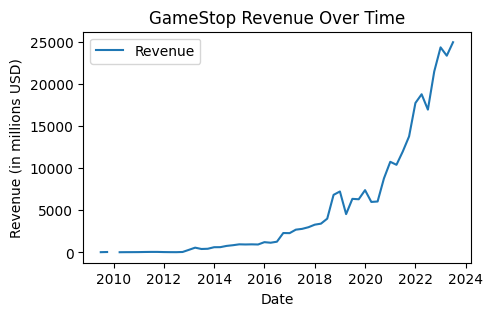

In [153]:
import matplotlib.pyplot as plt
# Convert 'Date' to datetime and 'Revenue' to numeric
gme_revenue['Date'] = pd.to_datetime(gme_revenue['Date'])
gme_revenue['Revenue'] = pd.to_numeric(gme_revenue['Revenue'])

# Plotting
plt.figure(figsize=(5, 3))
plt.plot(gme_revenue['Date'], gme_revenue['Revenue'], label='Revenue')
plt.title('GameStop Revenue Over Time')
plt.xlabel('Date')
plt.ylabel('Revenue (in millions USD)')
plt.legend()
plt.show()